In [1]:
import numpy as np

## Reading the txt

In [2]:
import re
def preprocess(text):
    text = text.lower()
#     remove non alphanumeric or whitespace characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    text = ' '.join([word for word in text.split() if len(word) > 1]) 
    return text

In [3]:
file = open("1661-0.txt", "r", encoding = "utf8")
lines = []
for i in file:
    preprocessed_i = preprocess(i)
    if preprocessed_i != '':
        lines.append(preprocessed_i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])
lines

The First Line:  project gutenbergs the adventures of sherlock holmes by arthur conan doyle
The Last Line:  subscribe to our email newsletter to hear about new ebooks


['project gutenbergs the adventures of sherlock holmes by arthur conan doyle',
 'this ebook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever you may copy it give it away or',
 'reuse it under the terms of the project gutenberg license included',
 'with this ebook or online at wwwgutenbergnet',
 'title the adventures of sherlock holmes',
 'author arthur conan doyle',
 'release date november 29 2002 ebook 1661',
 'last updated may 20 2019',
 'language english',
 'character set encoding utf8',
 'start of this project gutenberg ebook the adventures of sherlock holmes',
 'produced by an anonymous project gutenberg volunteer and jose menendez',
 'cover',
 'the adventures of sherlock holmes',
 'by arthur conan doyle',
 'contents',
 'scandal in bohemia',
 'ii the redheaded league',
 'iii case of identity',
 'iv the boscombe valley mystery',
 'the five orange pips',
 'vi the man with the twisted lip',
 'vii the adventure of the blue carbuncle',
 'viii 




We need to convert the text to numbers cuz NN understand numbers
Tokenizer will do the same for us





In [24]:
# pip install numpy==1.23.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
# !pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer is a class. We will create an object of that class. This object has many methods like fit_on_texts()

In [6]:
tokenizer = Tokenizer()

assign each word a number using fit_on_texts()

In [7]:
tokenizer.fit_on_texts([lines])

now to see what index is allocated to which word, use word_index()

In [8]:
tokenizer.index_word

{1: 'yes',
 2: 'it',
 3: 'no',
 4: 'nothing',
 5: 'none',
 6: 'what then',
 7: 'certainly',
 8: 'yes sir',
 9: 'matter',
 10: 'entirely',
 11: 'room',
 12: 'never',
 13: 'remarked',
 14: 'well',
 15: 'my dear holmes',
 16: 'here',
 17: 'him',
 18: 'produced by an anonymous project gutenberg volunteer and jose menendez',
 19: 'scandal in bohemia',
 20: 'ii the redheaded league',
 21: 'iii case of identity',
 22: 'iv the boscombe valley mystery',
 23: 'the five orange pips',
 24: 'vi the man with the twisted lip',
 25: 'vii the adventure of the blue carbuncle',
 26: 'viii the adventure of the speckled band',
 27: 'ix the adventure of the engineers thumb',
 28: 'the adventure of the noble bachelor',
 29: 'xi the adventure of the beryl coronet',
 30: 'xii the adventure of the copper beeches',
 31: 'but how',
 32: 'and why',
 33: 'present',
 34: 'said',
 35: 'precisely',
 36: 'and the work',
 37: 'of laughter',
 38: 'morning',
 39: 'before',
 40: 'all',
 41: 'life',
 42: 'road',
 43: 'them'

split the dataset on the basis of newline \n
and then convert it into  numbers based on the indexing above

In [13]:
input_sequences = []
for sentence in lines:
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    # tokenizer.texts_to_sequences([sentence]) each sentence is a 2d list so take 0th idx

    # target= we have to generate [93, 1], [93, 1, 13], [93, 1, 13, 20] from [[93, 1, 13, 20]]
    # for every sentence this loop will run (n - 1) times the length of that sentence\
    # to avoid single element like [93] we took i from 1 not 0. But slicing starts from 0
    for i in range (1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

In [14]:
input_sequences

[[3, 286],
 [3, 1285],
 [3, 1285, 2],
 [3, 1285, 2, 2],
 [1930, 5460],
 [1930, 5460, 3189],
 [1930, 5460, 3189, 17],
 [52, 6579],
 [52, 6579, 286],
 [52, 2],
 [52, 2, 8444],
 [52, 2, 8444, 4924],
 [40, 286],
 [40, 286, 4244],
 [2, 286],
 [4924, 3341],
 [7356, 4924],
 [7356, 4924, 12],
 [4575, 286],
 [4244, 8444],
 [4575, 286],
 [4244, 3189],
 [4244, 3189, 17],
 [4244, 3189, 17, 286],
 [4244, 3189, 17, 286, 3189],
 [286, 7017],
 [286, 1254],
 [286, 1254, 1254],
 [286, 1254, 1254, 286],
 [286, 286],
 [4924, 1672],
 [4924, 1672, 286],
 [286, 5307],
 [8652, 62],
 [8652, 62, 4390],
 [7824, 5460],
 [7824, 5460, 286],
 [1930, 1944],
 [1930, 1944, 286],
 [1930, 1944, 286, 4924],
 [4924, 11],
 [286, 17],
 [286, 17, 62],
 [286, 286],
 [286, 286, 7385],
 [4924, 1944],
 [4924, 1944, 4924],
 [7385, 8444],
 [7385, 8444, 2],
 [7385, 8444, 2, 4924],
 [62, 4924],
 [62, 286],
 [286, 4924],
 [286, 4924, 39],
 [286, 62],
 [286, 62, 4257],
 [1285, 4924],
 [1285, 4924, 13],
 [1285, 4924, 13, 1285],
 [286, 1

All the rows do not have same size(shape ).But supervised learning has same shape inputs. So we will do padding in the start of each sentence. The padding amt will be relational to the largest sentence in input_subsequences


In [15]:
max_len = max([len(x) for x in input_sequences]) #57
max_len

9

do the maxpadding to each each elem in input_sequences

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

In [21]:
for i in range( 20):
    print(padded_input_sequences[i])

[  0   0   0   0   0   0   0   3 286]
[   0    0    0    0    0    0    0    3 1285]
[   0    0    0    0    0    0    3 1285    2]
[   0    0    0    0    0    3 1285    2    2]
[   0    0    0    0    0    0    0 1930 5460]
[   0    0    0    0    0    0 1930 5460 3189]
[   0    0    0    0    0 1930 5460 3189   17]
[   0    0    0    0    0    0    0   52 6579]
[   0    0    0    0    0    0   52 6579  286]
[ 0  0  0  0  0  0  0 52  2]
[   0    0    0    0    0    0   52    2 8444]
[   0    0    0    0    0   52    2 8444 4924]
[  0   0   0   0   0   0   0  40 286]
[   0    0    0    0    0    0   40  286 4244]
[  0   0   0   0   0   0   0   2 286]
[   0    0    0    0    0    0    0 4924 3341]
[   0    0    0    0    0    0    0 7356 4924]
[   0    0    0    0    0    0 7356 4924   12]
[   0    0    0    0    0    0    0 4575  286]
[   0    0    0    0    0    0    0 4244 8444]


## Creating the X and Y data

In [22]:
X = padded_input_sequences[:, :-1]
y = padded_input_sequences[:, -1]
print(X.shape)
print(y.shape)

(10322, 8)
(10322,)


In [23]:
y

array([ 286, 1285,    2, ..., 8444, 4209, 8444], dtype=int32)

our task is a **multiclass classification** task. We will use one hot encoding for each output. Like for eg. for the word represented as "2" in the vocab, one hot encoding is [0 0 1 0 0 0 0 0 0 0 0 0 0......]

In [24]:
len(tokenizer.word_index)

9525

len(tokenizer.word_index) + 1 is done because one hot encoding starts from 0 and goes uptil (n-1). However, our word to num list contains indexing from 1 to len(tokenizer.word_index).
So, we ensure that the last word is also one hot encoded, we put a +1


In [25]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)

In [26]:
y.shape

(10322, 9526)

one hot encodings=

1 = [0 1 0 0 0 0 ......],

2 = [0 0 1 0 0 0 0 ......]

## architechture of lstm

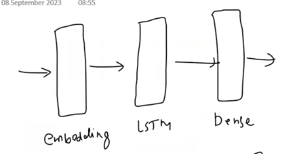

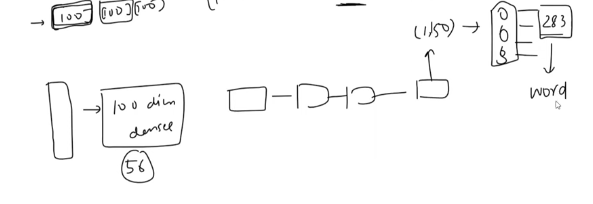

In [27]:
vocab_count = len(tokenizer.word_index) + 1 #283
vocab_count

9526

In [28]:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, LSTM, Dense

The embedding vector will output `100 dim` "dense" vector for each token. So if input is `(1, 56)` output will be `(1, 56, 100)`

In [29]:
max_len

9

In [2]:
model = Sequential()
model.add(Embedding(input_dim = vocab_count, output_dim = 100, input_len = max_len - 1)) #bcuz x does not contain the last layer(output) so size = max_len - 1
model.add(LSTM(150))
model.add(Dense(vocab_count, activation = 'softmax'))

NameError: name 'Sequential' is not defined

In [31]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- **Params of embedding layer =**>

    283 words *  100 dim vector for each word => 28300
    
- **params of dense layer =>**

    150(no. of nodes in lstm) * 283(output of dense) + 283(biases) = 42733

## Train the model

In [ ]:
model.fit(X, y, epochs = 50)

Epoch 1/50
27/27 [==============================] - 3s 44ms/step - loss: 5.4733 - accuracy: 0.0637
Epoch 2/50
27/27 [==============================] - 1s 45ms/step - loss: 5.1063 - accuracy: 0.0776
Epoch 3/50
27/27 [==============================] - 1s 44ms/step - loss: 5.0312 - accuracy: 0.0776
Epoch 4/50
27/27 [==============================] - 1s 44ms/step - loss: 4.9937 - accuracy: 0.0776
Epoch 5/50
27/27 [==============================] - 1s 44ms/step - loss: 4.9547 - accuracy: 0.0776
Epoch 6/50
27/27 [==============================] - 1s 43ms/step - loss: 4.8887 - accuracy: 0.0776
Epoch 7/50
27/27 [==============================] - 1s 44ms/step - loss: 4.7564 - accuracy: 0.0997
Epoch 8/50
27/27 [==============================] - 1s 44ms/step - loss: 4.5569 - accuracy: 0.1309
Epoch 9/50
27/27 [==============================] - 1s 46ms/step - loss: 4.3154 - accuracy: 0.1796
Epoch 10/50
27/27 [==============================] - 1s 46ms/step - loss: 4.0676 - accuracy: 0.1981
Epoch 11/

In [ ]:
text = "python"

for i in range (8):
    # tokenize
    token_text = tokenizer.texts_to_sequences([text])[0]
    # then pad
    padded_token_text = pad_sequences([token_text], maxlen = max_len - 1, padding = 'pre')
    # predict
    # model.predict(padded_token_text) #this will give a vector of dim 283(i.e vocab size)
    predicted_index = np.argmax(model.predict(padded_token_text))
    predicted_word = tokenizer.index_word[predicted_index]
    text = text + " " +predicted_word
    print(text)

1/1 [==============================] - 0s 28ms/step
python fundamentals
1/1 [==============================] - 0s 27ms/step
python fundamentals for
1/1 [==============================] - 0s 26ms/step
python fundamentals for data
1/1 [==============================] - 0s 27ms/step
python fundamentals for data science
1/1 [==============================] - 0s 26ms/step
python fundamentals for data science mentorship
1/1 [==============================] - 0s 27ms/step
python fundamentals for data science mentorship program
1/1 [==============================] - 0s 27ms/step
python fundamentals for data science mentorship program dsmp
1/1 [==============================] - 0s 27ms/step
python fundamentals for data science mentorship program dsmp 2023
